In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import torch.nn as nn

In [23]:
df = pd.read_csv("C:/Users/DELL-PC/Downloads/netflix.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
...,...,...,...,...,...,...,...
4876,05-10-2021,640.390015,606.890015,606.940002,634.809998,9534300,634.809998
4877,06-10-2021,639.869995,626.359985,628.179993,639.099976,4580400,639.099976
4878,07-10-2021,646.840027,630.450012,642.229981,631.849976,3556900,631.849976
4879,08-10-2021,643.799988,630.859985,634.169983,632.659973,3271100,632.659973


In [6]:
seq_len = 15

In [7]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [8]:
X = []
y = []


In [9]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i + seq_len])
    y.append(scaled_price[i + seq_len])

In [10]:
X = np.array(X)[... , None]
y = np.array(y)[... , None]

In [11]:
train_x = torch.from_numpy(X[:int(0.8 * X.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8 * X.shape[0])]).float()
test_x = torch.from_numpy(X[int(0.8 * X.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8 * X.shape[0]):]).float()

In [12]:
class Model(nn.Module):
    def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
    def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])
model = Model(1 , 64)

In [13]:
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
loss_fn = nn.MSELoss()

In [14]:
num_epochs = 100

In [15]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output , train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch , "epoch loss" , loss.detach().numpy())

10 epoch loss 0.004436007
20 epoch loss 0.0038286461
30 epoch loss 0.0030382075
40 epoch loss 0.0016933953
50 epoch loss 0.00016588914
60 epoch loss 6.932217e-05
70 epoch loss 4.4512908e-05
80 epoch loss 3.8721588e-05
90 epoch loss 2.835931e-05


In [16]:
model.eval()
with torch.no_grad():
    output = model(test_x)

In [17]:
pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())

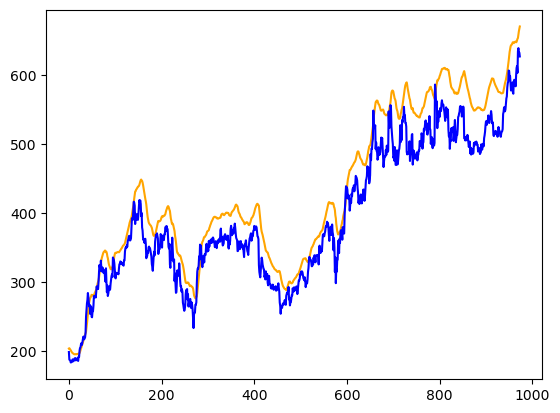

In [21]:
plt.plot(pred.squeeze() , color = "orange" , label = "predicted")
plt.plot(real.squeeze() , color = "blue" , label = "real")
plt.show()